### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [678]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly as pl

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [679]:
data = pd.read_csv('data/coupons.csv')

In [680]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [681]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

**Get % of data that has missing / na / null data**

In [682]:
data.isnull().mean()*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [683]:
col_features = data.columns.values.tolist() 
for item in col_features: 
    print('{0} \t {1} \n'.format(item, data[item].unique()))

destination 	 ['No Urgent Place' 'Home' 'Work'] 

passanger 	 ['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] 

weather 	 ['Sunny' 'Rainy' 'Snowy'] 

temperature 	 [55 80 30] 

time 	 ['2PM' '10AM' '6PM' '7AM' '10PM'] 

coupon 	 ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)'] 

expiration 	 ['1d' '2h'] 

gender 	 ['Female' 'Male'] 

age 	 ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 

maritalStatus 	 ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] 

has_children 	 [1 0] 

education 	 ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School'] 

occupation 	 ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Person

In [684]:
#Check for Infinite values in float types 
#ds = data.isin([np.inf, -np.inf])
#print(ds)
count = np.isinf(data.temperature).values.sum() 
print("It contains " + str(count) + " infinite values") 

It contains 0 infinite values


3. Decide what to do about your missing data -- drop, replace, other...

In [685]:
#Columns we consider low % of missing data are : ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
# Replace NA values with a string "unknown" to establish some value first
#data = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].fillna('unknown')
data = data.replace(np.nan, 'unknown')

#Confirm replacing NA with string value to keep data: 
data.query('CarryAway=="unknown"')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8644,Home,Alone,Sunny,80,6PM,Bar,2h,Female,26,Married partner,...,less1,unknown,less1,less1,1,0,0,1,0,1
8645,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,Married partner,...,less1,unknown,less1,less1,1,1,1,0,1,0
8646,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Female,26,Married partner,...,less1,unknown,less1,less1,1,1,1,0,1,0
8647,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Female,26,Married partner,...,less1,unknown,less1,less1,1,1,1,0,1,0


### Rationale from analysis on data:
* The frequency of visitations by drivers to various venues has a low NAN value % at under ~ 1.5% 
* Car feature for type of driver transportation has bad data so do not use for analysis but keeping it with that awarness (will not use in analysis) (could drop this column)


In [686]:
col_features = data.columns.values.tolist() 
for item in col_features: 
    #print(item)
    #Format printing as you would like for future arra list output as feature: array list 
    #print(data[item].unique())
    print('{0} \t {1} \n'.format(item, data[item].unique()))

destination 	 ['No Urgent Place' 'Home' 'Work'] 

passanger 	 ['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] 

weather 	 ['Sunny' 'Rainy' 'Snowy'] 

temperature 	 [55 80 30] 

time 	 ['2PM' '10AM' '6PM' '7AM' '10PM'] 

coupon 	 ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)'] 

expiration 	 ['1d' '2h'] 

gender 	 ['Female' 'Male'] 

age 	 ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 

maritalStatus 	 ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] 

has_children 	 [1 0] 

education 	 ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School'] 

occupation 	 ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Person

4. What proportion of the total observations chose to accept the coupon? 



In [687]:
df_acceptance = data.groupby("Y")[['Y']].count()
print(df_acceptance.Y.sum())
df_acceptance['percent'] = (df_acceptance['Y']/df_acceptance.Y.sum())*100

df_acceptance

12684


,Y,percent
Y,,
0,5474,43.156733
1,7210,56.843267


##### 57% of total observations choose to accept the coupons with 43% declining the coupon

5. Use a bar plot to visualize the `coupon` column.

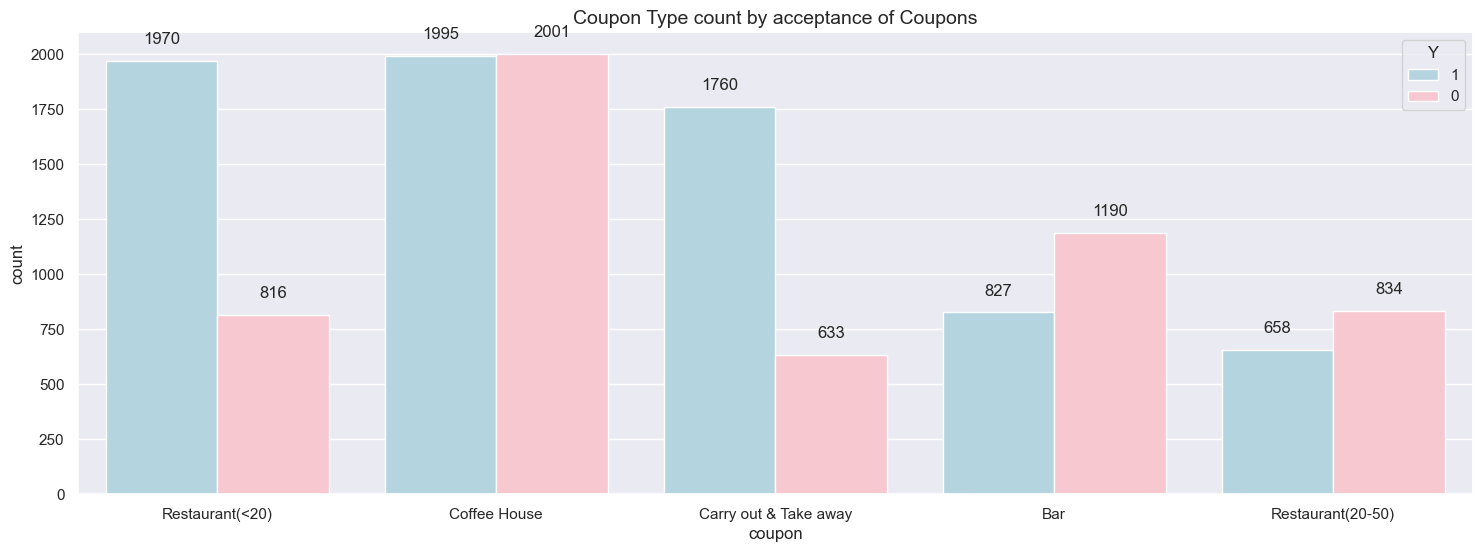

In [688]:
#Issue to resolve : AttributeError: 'numpy.int64' object has no attribute 'startswith' : convert Y category to a string for plot to visuzlize coupon by acceptance 
# **NOTE** when using the data column re-set to int64 type for feature = Y 
data['Y'] = data['Y'].astype(str)
fig1 = plt.figure(figsize=(18, 6))
ax = sns.countplot(data, x='coupon', hue='Y', palette=['lightblue', 'pink'])
for container in ax.containers:
    ax.bar_label(container, padding=10, rotation=0)

ax.axes.set_title("Coupon Type count by acceptance of Coupons", fontsize=14)

plt.show()

#### Bar plot shows the various coupon types with their respective acceptance rates 
* Restaurant(<20) or less costly venues seem to have a high coupon acceptance rates - this is consistenty with the common thinking that budget minded restaurant goers will take time and energy to use take and use coupons.
* Bar coupons have the largest numbers of coupon declines given and further analysis could help target the drivers that use bar coupons 

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



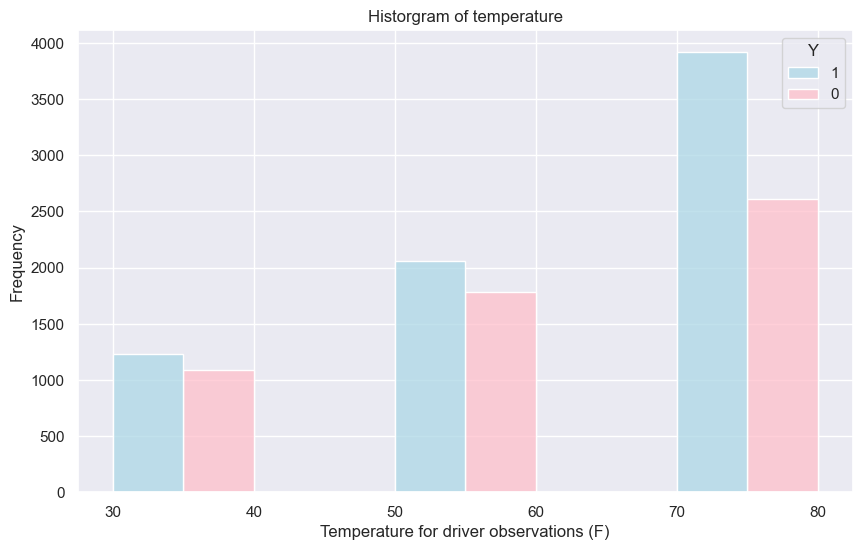

In [689]:
# Use the Seaborn historgram to visualize temperature column and set bins to represent a tighter window 
# for easier visualization to understand temperature category impact 

plt.figure(figsize=(10,6))
sns.histplot(data=data, x='temperature', hue='Y', bins=5, palette=['lightblue', 'pink'], multiple="dodge")
plt.title('Historgram of temperature')
plt.xlabel('Temperature for driver observations (F)')
plt.ylabel('Frequency')
plt.grid('True')
plt.show()


#### Temperatures binned by as unique categorical values for feature shows a greater acceptance rate relitive to lower temperatures
* When temperaturs is highest in the range we can see a much greater coupon acceptance rate relative to the other 2 lower temperatures experienced by drivers -  more drivers are out when the weather is good & more likely to visit a venue in good weather - further investigation could showcase what venues are most popular in hot weather. 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [690]:
# Reset the "Y" acceptance feature back to int64 for groupby functions to work given change in above section for Seaborn plotting requireing a string
#
data['Y'] = data['Y'].astype('int64')
df_bar_coupon = pd.DataFrame(data.query('coupon =="Bar"'))
df_bar_coupon.info()
#Confirm new dataframe has the correct total for responses for acceptance of bar coupons 
df_bar_coupon['Y'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   2017 non-null   object
 15  Bar                   2017 non-null   obje

Y
0    1190
1     827
Name: count, dtype: int64

2. What proportion of bar coupons were accepted?


In [691]:

df_bar_coupon_acceptance =  df_bar_coupon.groupby("Y")[['Y']].count()

df_bar_coupon_acceptance['percent'] = (df_bar_coupon_acceptance['Y']/df_bar_coupon_acceptance.Y.sum())*100
display(df_bar_coupon_acceptance)


,Y,percent
Y,,
0,1190,58.998513
1,827,41.001487


##### 41% of the bar coupons were accepted per observations and 59% declined the bar coupons

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [692]:
# Bar 	 ['never' 'less1' '1~3' 'gt8' 'unknown' '4~8']  
#Create filter lists for Question 3: 
options_3orFewer = ['never','less1','1~3']
# Note we have to explicitely remove "unknown" from list below for those who went more based upon data cleaning conducted to replace NaN w/ "unknown"
options_more = ['gt8','4~8']

# Extract acceptance rate of coupon for observations with options_3or_Fewer: 
df_bar_3orFewer = df_bar_coupon.query('Bar == @options_3orFewer').groupby("Y")[['Y']].count()
df_bar_3orFewer['percent'] = (df_bar_3orFewer['Y']/df_bar_3orFewer.Y.sum())*100
print (df_bar_3orFewer)

# Extract acceptance rate of coupon for observations with options_more 
# Note we do not count "unknown" as the data cleaning step was to replace NaN values with "unknown"
#df_bar_moreThan3 = df_bar_coupon[df_bar_coupon['Bar'].isin(options_more)]
df_bar_moreThan3 = df_bar_coupon.query('Bar == @options_more').groupby("Y")[['Y']].count()
df_bar_moreThan3['percent'] = (df_bar_moreThan3['Y']/df_bar_moreThan3.Y.sum())*100
print (df_bar_moreThan3)

      Y   percent
Y                
0  1131  62.93823
1   666  37.06177
     Y    percent
Y                
0   46  23.115578
1  153  76.884422


Text(0.5, 1.0, 'Attendance Bar: More than 3 times a month')

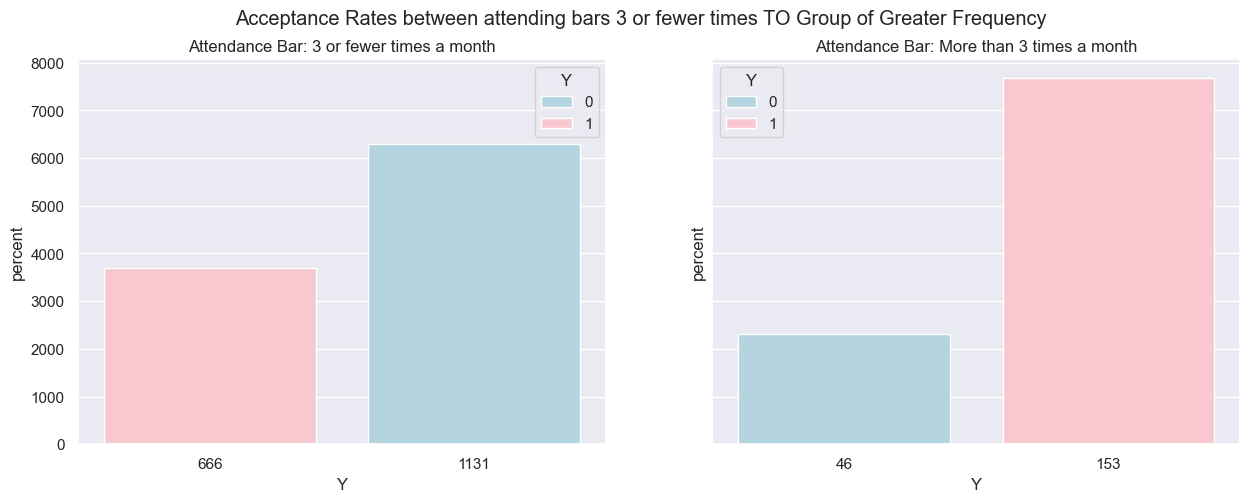

In [693]:
# Create subplots to visualize the table for the Group that went to a bar 3 or fewer times vs. the group that went to a Bar more than 3 times a per month:
# useful ref utilized: https://www.tutorialspoint.com/how-to-create-subplots-with-python-plotly 
#
fig2, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig2.suptitle('Acceptance Rates between attending bars 3 or fewer times TO Group of Greater Frequency')

sns.barplot(ax=axes[0], x=df_bar_3orFewer['Y'], y=df_bar_3orFewer['percent'].mul(100), hue=df_bar_3orFewer.index.astype(str), palette=['lightblue', 'pink'], dodge=False)
sns.barplot(ax=axes[1], x=df_bar_moreThan3['Y'], y=df_bar_moreThan3['percent'].mul(100), hue=df_bar_moreThan3.index.astype(str), palette=['lightblue', 'pink'], dodge=False)
axes[0].set_title('Attendance Bar: 3 or fewer times a month')
axes[1].set_title('Attendance Bar: More than 3 times a month')




##### Acceptance rate of those that went greater than 3 times to a bar had a higher acceptance rate from observations ( 77% acceptance rate versus a 37% acceptance rate for those that went to a bar 3 or fewer times)
* Althought the population of observations (drivers) attending bars more than 3 times was low compared to the less than 3 per month bar goers, it is clear that the acceptance rate of bar coupon is very high in terms of percent of acceptances for drivers that go to a Bar in high frequency - this group would be a good group to focus promotions for Bars for maximum acceptance.  

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [694]:
# Note* : when considering "all others" criteria for filter, adding "unknown" category for Bar visit value as we still need to count coupon acceptance rate for this category
# given the intrepretation for all other criteria

# Bar 	 ['never' 'less1' '1~3' 'gt8' 'unknown' '4~8']  
# age 	 ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 
filter_list_bar_more_than_1perMonth = ['1~3','gt8','4~8']
filter_list_bar_age_over_25 = ['26','31','36','41','46','50plus']

#Create dataframe to use as the basis to consider the "comparison to the filtered DF below to all other observations" in the bar_coupon dataframe:
# df_bar_moreThan1perMonth = df_bar_coupon.query('(Bar == "1~3" or Bar == "gt8" or Bar == "4~8") and (age != "21" and age != "below21")')
df_bar_moreThan1perMonth = df_bar_coupon.query('(Bar == @filter_list_bar_more_than_1perMonth) and (age == @filter_list_bar_age_over_25)')

#Use this _2 data frane to groupby and modify to create the ratio output for acceptance 
df_bar_moreThan1perMonth_2 = df_bar_coupon.query('(Bar == @filter_list_bar_more_than_1perMonth) and (age == @filter_list_bar_age_over_25)').groupby(['Y'])[['Y']].count()
df_bar_moreThan1perMonth_2['percent'] = (df_bar_moreThan1perMonth_2['Y']/df_bar_moreThan1perMonth_2.Y.sum())*100
print(df_bar_moreThan1perMonth_2)

#DF for the all others condition to compare the first group against using ~ and isin method : 
df_bar_all_other = df_bar_coupon[~df_bar_coupon.index.isin(df_bar_moreThan1perMonth.index)].groupby(['Y'])[['Y']].count()
df_bar_all_other['percent'] = (df_bar_all_other['Y']/df_bar_all_other.Y.sum())*100

print(df_bar_all_other)

     Y   percent
Y               
0  128  30.47619
1  292  69.52381
      Y    percent
Y                 
0  1062  66.499687
1   535  33.500313


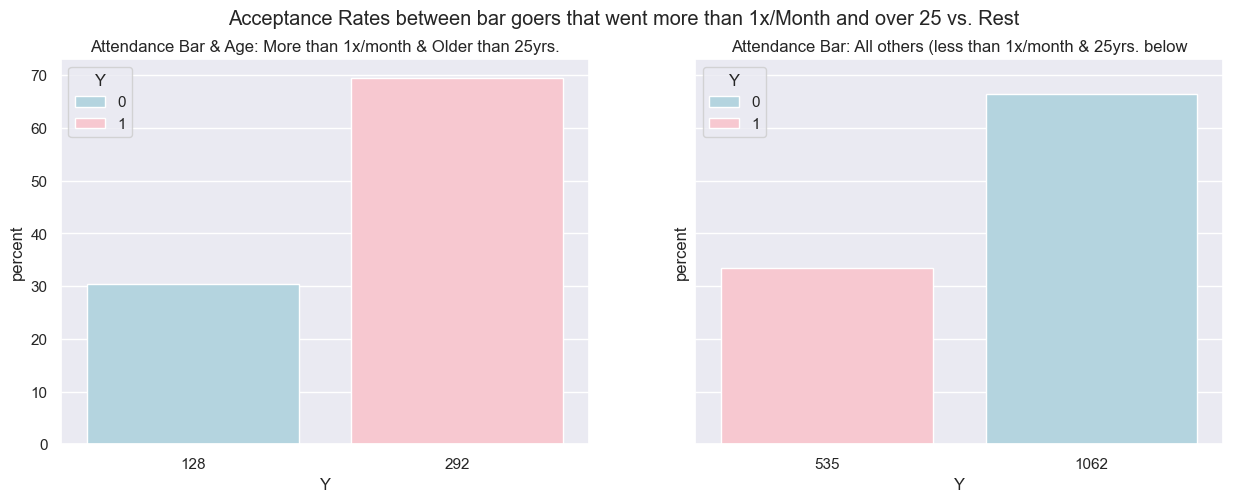

In [713]:
# Create subplots to visualize the tables
#
#
fig3, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig3.suptitle('Acceptance Rates between bar goers that went more than 1x/Month and over 25 vs. Rest')

sns.barplot(ax=axes[0], x=df_bar_moreThan1perMonth_2['Y'], y=df_bar_moreThan1perMonth_2['percent'], hue=df_bar_moreThan1perMonth_2.index.astype(str), palette=['lightblue', 'pink'], dodge=False)
sns.barplot(ax=axes[1], x=df_bar_all_other['Y'], y=df_bar_all_other['percent'], hue=df_bar_all_other.index.astype(str), palette=['lightblue', 'pink'], dodge=False)
axes[0].set_title('Attendance Bar & Age: More than 1x/month & Older than 25yrs.')
axes[1].set_title('Attendance Bar: All others (less than 1x/month & 25yrs. below')

plt.show()


##### Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others from observations was a 70% acceptance rate compared to a 33% acceptance rate of bar coupons for the all others group of drivers.  
* Frequency of visits to the bar in a month results in a high bar coupon acceptance as the others grouping showed far less frequency to bar visits per month (table )
* Reviewing the all other unique values resulted in Age not being as critical a factor as the frequency per month a driver visits a bar based upon further review of the "all other" grouping 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [696]:

df_bar_moreThan1perMonth_p5_a = df_bar_coupon.query('(Bar == @filter_list_bar_more_than_1perMonth)').groupby(['Y'])[['Y']].count()
df_bar_moreThan1perMonth_p5_a['percent'] = (df_bar_moreThan1perMonth_p5_a['Y']/df_bar_moreThan1perMonth_p5_a.Y.sum())*100
print (df_bar_moreThan1perMonth_p5_a)

df_bar_moreThan1perMonth_p5_b = df_bar_coupon.query('(passanger != "Kid(s)")').groupby(['Y'])[['Y']].count()
df_bar_moreThan1perMonth_p5_b['percent'] = (df_bar_moreThan1perMonth_p5_b['Y']/df_bar_moreThan1perMonth_p5_b.Y.sum())*100
print (df_bar_moreThan1perMonth_p5_b)

#Contra Example: drivers go to bar less than 1x per month, passengers were a Kid, had occupations of  : farming, fishing, forestry : 
# Results in an empty query so that criteria is not met - do more data sanity checks below 
df_bar_moreThan1perMonth_p5_c = df_bar_coupon.query('(occupation != "Farming Fishing & Forestry")').groupby(['Y'])[['Y']].count()
df_bar_moreThan1perMonth_p5_c['percent'] = (df_bar_moreThan1perMonth_p5_c['Y']/df_bar_moreThan1perMonth_p5_c.Y.sum())*100
print (df_bar_moreThan1perMonth_p5_c)


     Y    percent
Y                
0  186  31.208054
1  410  68.791946
      Y    percent
Y                 
0  1027  56.709001
1   784  43.290999
      Y    percent
Y                 
0  1185  59.013944
1   823  40.986056


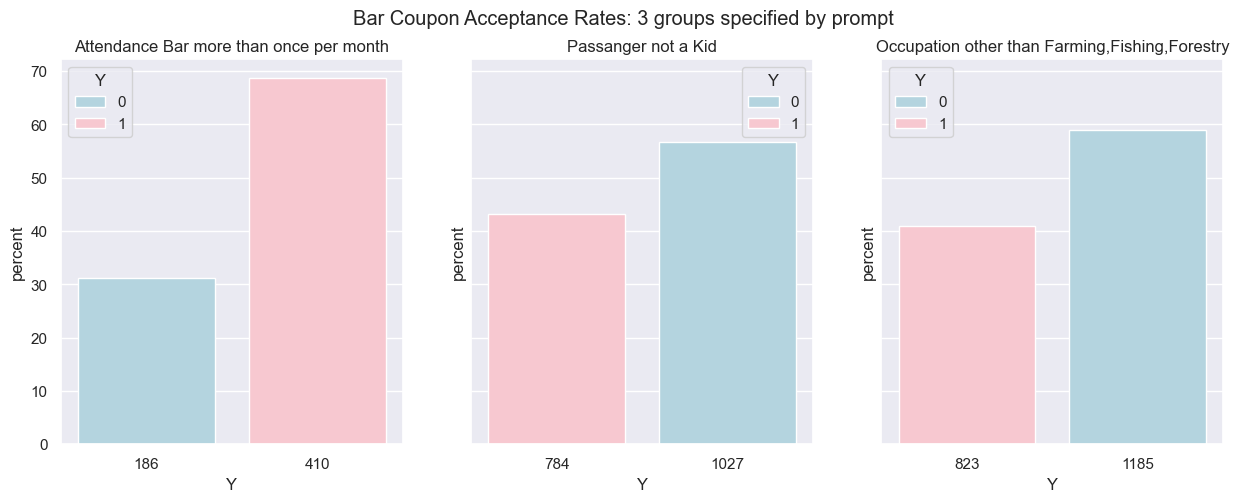

In [714]:
# Create subplots to visualize the table for the Group that went to a bar 3 or fewer times vs. the group that went to a Bar more than 3 times a per month:
#
#
fig4, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig4.suptitle('Bar Coupon Acceptance Rates: 3 groups specified by prompt')

sns.barplot(ax=axes[0], x=df_bar_moreThan1perMonth_p5_a['Y'], y=df_bar_moreThan1perMonth_p5_a['percent'], hue=df_bar_moreThan1perMonth_p5_a.index.astype(str), palette=['lightblue', 'pink'], dodge=False)
sns.barplot(ax=axes[1], x=df_bar_moreThan1perMonth_p5_b['Y'], y=df_bar_moreThan1perMonth_p5_b['percent'], hue=df_bar_moreThan1perMonth_p5_b.index.astype(str), palette=['lightblue', 'pink'], dodge=False)
sns.barplot(ax=axes[2], x=df_bar_moreThan1perMonth_p5_c['Y'], y=df_bar_moreThan1perMonth_p5_c['percent'], hue=df_bar_moreThan1perMonth_p5_c.index.astype(str), palette=['lightblue', 'pink'], dodge=False)

axes[0].set_title('Attendance Bar more than once per month')
axes[1].set_title('Passanger not a Kid')
axes[2].set_title('Occupation other than Farming,Fishing,Forestry')

plt.show()


#### Acceptance rate is highest for Bar coupons for those that attend a bar more than once per month (69%) in comparision to the other groups: (passanger not a kid - 43% and Occupation other than Farming/Fishing ~ 40%)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [698]:
#Shared filter list to use and possible reuse in conditionals for 6.1, 6.2, 6.3 conditions:
filter_list_bar_more_than_1perMonth = ['1~3','gt8','4~8']
filter_list_cheap_restaurant_moreThan4perMonth = ['4~8','gt8']
filter_list_income50kbelow = ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499','Less than $12500']

#Problem 6 - Use Case 1 :  Go to bars more than 1 Time a month & passengers that were NOT a Kid & were not widowed 
# maritalStatus 	 ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] 
df_bar_moreThan1perMonth_p6_1 = df_bar_coupon.query('(Bar == @filter_list_bar_more_than_1perMonth) and (passanger != "Kid(s)") and (maritalStatus != "Widowed")').groupby(['Y'])[['Y']].count()
df_bar_moreThan1perMonth_p6_1['percent'] = (df_bar_moreThan1perMonth_p6_1['Y']/df_bar_moreThan1perMonth_p6_1.Y.sum())*100
display (df_bar_moreThan1perMonth_p6_1)

#Problem 6 - Use Case 2 :  Go to bars more than 1 Time a month & age is under 30 years old
# age 	 ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 
filter_list_6_2 = ['21','26','below21']

df_bar_moreThan1perMonth_p6_2 = df_bar_coupon.query('(Bar == @filter_list_bar_more_than_1perMonth) and (age == @filter_list_6_2)').groupby(['Y'])[['Y']].count()
df_bar_moreThan1perMonth_p6_2['percent'] = (df_bar_moreThan1perMonth_p6_2['Y']/df_bar_moreThan1perMonth_p6_2.Y.sum())*100
display (df_bar_moreThan1perMonth_p6_2)

# Go to cheap restaurants more than 4 Times a Month & income is less than 50K
# Frequency for Cheap Restaurant  RestaurantLessThan20 	 ['4~8' '1~3' 'less1' 'gt8' nan 'never'] 
df_bar_moreThan1perMonth_p6_3 = df_bar_coupon.query('(RestaurantLessThan20 == @filter_list_cheap_restaurant_moreThan4perMonth) and (income == @filter_list_income50kbelow)').groupby(['Y'])[['Y']].count()
df_bar_moreThan1perMonth_p6_3['percent'] = (df_bar_moreThan1perMonth_p6_3['Y']/df_bar_moreThan1perMonth_p6_3.Y.sum())*100
display (df_bar_moreThan1perMonth_p6_3)


,Y,percent
Y,,
0,158,28.675136
1,393,71.324864


,Y,percent
Y,,
0,96,27.826087
1,249,72.173913


,Y,percent
Y,,
0,188,54.651163
1,156,45.348837


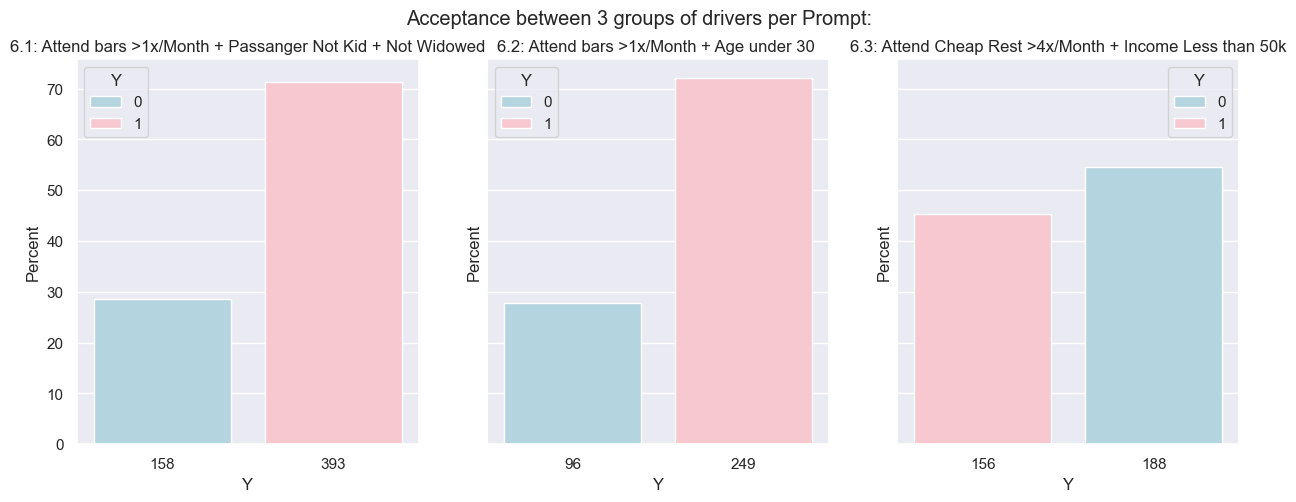

In [715]:
# Create subplots to visualize the table for the Group that went to a bar 3 or fewer times vs. the group that went to a Bar more than 3 times a per month:
#
#
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Acceptance between 3 groups of drivers per Prompt:')

sns.barplot(ax=axes[0], x=df_bar_moreThan1perMonth_p6_1['Y'], y=df_bar_moreThan1perMonth_p6_1['percent'], hue=df_bar_moreThan1perMonth_p6_1.index.astype(str), palette=['lightblue', 'pink'], dodge=False)
sns.barplot(ax=axes[1], x=df_bar_moreThan1perMonth_p6_2['Y'], y=df_bar_moreThan1perMonth_p6_2['percent'], hue=df_bar_moreThan1perMonth_p6_2.index.astype(str), palette=['lightblue', 'pink'], dodge=False)
sns.barplot(ax=axes[2], x=df_bar_moreThan1perMonth_p6_3['Y'], y=df_bar_moreThan1perMonth_p6_3['percent'], hue=df_bar_moreThan1perMonth_p6_3.index.astype(str), palette=['lightblue', 'pink'], dodge=False)
axes[0].set_title("6.1: Attend bars >1x/Month + Passanger Not Kid + Not Widowed")
axes[1].set_title("6.2: Attend bars >1x/Month + Age under 30 ")
axes[2].set_title("6.3: Attend Cheap Rest >4x/Month + Income Less than 50k")
axes[0].set(ylabel='Percent')
axes[1].set(ylabel='Percent')
axes[2].set(ylabel='Percent')

plt.show()

#### Frequency of visits to a bar in a month (more than once), age has a strong acceptance rate while individuals frequenting cheap restaurants and lower income bracket did not: 
1. Frequency (more than 1x visits to bars) is a strong indicator for acceptance with passanger not a kid (71%)
2. Age of 30 also had a very high acceptance rate (72%)
3. Those that have a lower income and prefer cheaper restaurants have a veyr low acceptance rate (45%) compared to the other groups 

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

##### Based Upon the analysis conducted on Bar Coupons there are some observations to help develop a campaign targetted at the optimal auidence for any marketing / promotional coupons

1. General observations about the Bar Coupon acceptance reate overall : 
    - 41% of the bar coupons were accepted per observations and 59% declined for the bar coupon based upon observations 
2. Characteristics of drivers that impact the acceptance rates of Bar Coupons tend to be the following:
    - Drivers under 25 tend to have a very high acceptance rate for Bar Coupons *100% Acceptance Rate* and Drivers under 30 also have fairly high *72% Acceptance Rate*
    - Drivers with income lower than 50K tend to frequenting cheap restaurants tend not to accept Bar Coupons (~ 45% acceptance rate)
    - Drivers with no child passangers tend to have a high acceptance rates when alone or with adult companion(s) (~ 71% acceptance rate)
    - As one would expect, drivers with kids don't accept bar coupons as well given the age restrictions for entrance into bars ()

Based upon the analysis above, the ideal campaign for owners of Bars would be to target the following groups for maximum coupon acceptance rates of their coupons:
- Drivers that tend to visit the Bars and are familar with their respective Bar (multiple visits / more than once per month) show the highest acceptance of Bar Coupons received 
- Drivers that are under 30 with adult companions and no children in the vehicle tend to be a good target auidence for Bar Coupon promotions with the highest acceptance rates for the Bar Coupons. 
- Drivers about 50k income would also be a good target group given frequening Bars tends to be an expensive outing and less likely for more conservatives in the 50k or below income range.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Investigate the Carry out & Take away Coupon 

In [700]:
df_carry_away_coupon = pd.DataFrame(data.query('coupon =="Carry out & Take away"'))
df_carry_away_coupon.info()
#Confirm new dataframe has the correct total for responses for acceptance of bar coupons 
df_carry_away_coupon['Y'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 2393 entries, 2 to 12680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2393 non-null   object
 1   passanger             2393 non-null   object
 2   weather               2393 non-null   object
 3   temperature           2393 non-null   int64 
 4   time                  2393 non-null   object
 5   coupon                2393 non-null   object
 6   expiration            2393 non-null   object
 7   gender                2393 non-null   object
 8   age                   2393 non-null   object
 9   maritalStatus         2393 non-null   object
 10  has_children          2393 non-null   int64 
 11  education             2393 non-null   object
 12  occupation            2393 non-null   object
 13  income                2393 non-null   object
 14  car                   2393 non-null   object
 15  Bar                   2393 non-null   obje

Y
1    1760
0     633
Name: count, dtype: int64

1. Explore the carray away (take out) coupons by looking at drivers that were alone or with passangers 


In [701]:
# Filter for query 
passanger_more_than1 = ['Friend(s)','Kid(s)','Partner']
#Independent Exploration - carry away coupon - Use Case 1 :  Acceptance rates of Drivers with Kid(s) compared to those that are driving alone or with adults in car
df_carryaway_passanger_kids = df_carry_away_coupon.query('(passanger == @passanger_more_than1)').groupby(['Y'])[['Y']].count()
df_carryaway_passanger_kids['percent'] = (df_carryaway_passanger_kids['Y']/df_carryaway_passanger_kids.Y.sum())*100
display (df_carryaway_passanger_kids)

df_carryaway_passanger_alone = df_carry_away_coupon.query('(passanger == "Alone")').groupby(['Y'])[['Y']].count()
df_carryaway_passanger_alone['percent'] = (df_carryaway_passanger_alone['Y']/df_carryaway_passanger_alone.Y.sum())*100
display (df_carryaway_passanger_alone)


,Y,percent
Y,,
0,250,25.303644
1,738,74.696356


,Y,percent
Y,,
0,383,27.259786
1,1022,72.740214


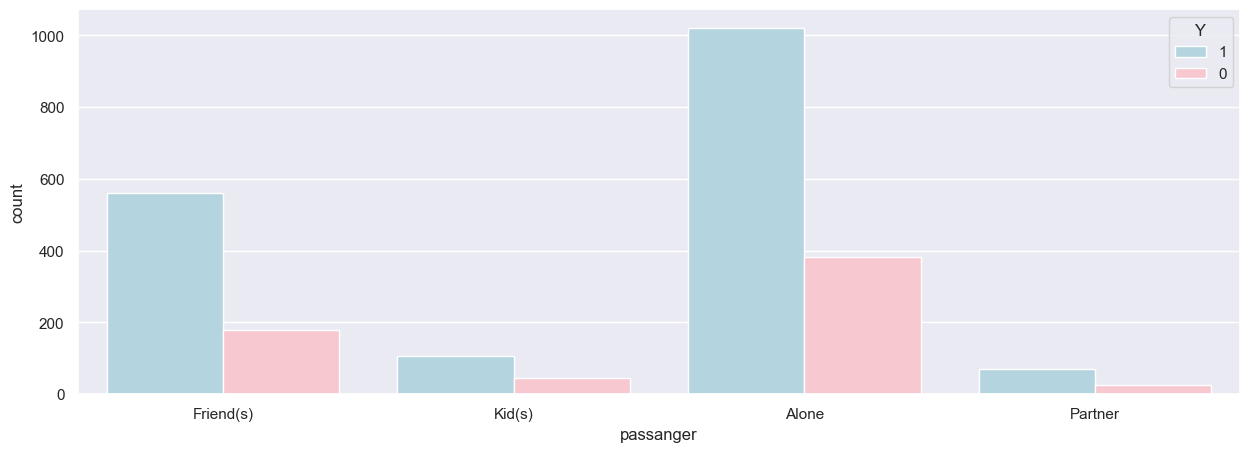

In [732]:
#Plotly express : note will not display in GitHub notebook 
pxfig_ind1 = px.bar(df_carry_away_coupon,x="passanger",title="Acceptance of Passanger type for Carry Away Coupon",color =df_carry_away_coupon.Y.astype(str), labels={"passanger": "Driver's Passanger Type"} )
pxfig_ind1.show()
pxfig_ind1.write_image("images/carry_away_acceptance_passanger_typ.png")
#pl.offline.plot(pxfig_ind1, filename='images/carry_away_acceptance_passanger_type.html')

#Same graph in Seaborn to visualize in GitHub as well for ease of use:
fig_ind1, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="passanger",data=df_carry_away_coupon,
                    hue=df_carry_away_coupon.Y.astype(str),
                       palette=['lightblue', 'pink'])


plt.show()

2. Explore carry out/take out coupon acceptance for drivers that had a destination of work compared to those that were not goine to work

In [703]:
#destination 	 ['No Urgent Place' 'Home' 'Work'] 

#Independent Exploration - carry away coupon - Use Case 2 :  Acceptance rates of Drivers drving home as a destination compared to those goine to Work
df_carryaway_destination_not_work = df_carry_away_coupon.query('(destination == "No Urgent Place" or destination == "Home")').groupby(['Y'])[['Y']].count()
df_carryaway_destination_not_work['percent'] = (df_carryaway_destination_not_work['Y']/df_carryaway_destination_not_work.Y.sum())*100
display (df_carryaway_destination_not_work)

df_carryaway_destination_work = df_carry_away_coupon.query('(destination == "Work")').groupby(['Y'])[['Y']].count()
df_carryaway_destination_work['percent'] = (df_carryaway_destination_work['Y']/df_carryaway_destination_work.Y.sum())*100
display (df_carryaway_destination_work)

,Y,percent
Y,,
0,370,22.685469
1,1261,77.314531


,Y,percent
Y,,
0,263,34.514436
1,499,65.485564


#### There was an increase in coupon acceptance rates for carry out from a restaurant for those that were going home or somewhere not urgent (77% acceptance rate) compared to those that were heading to work (65% acceptance rate)

3. Further Investigation of the group with distinations show below that 

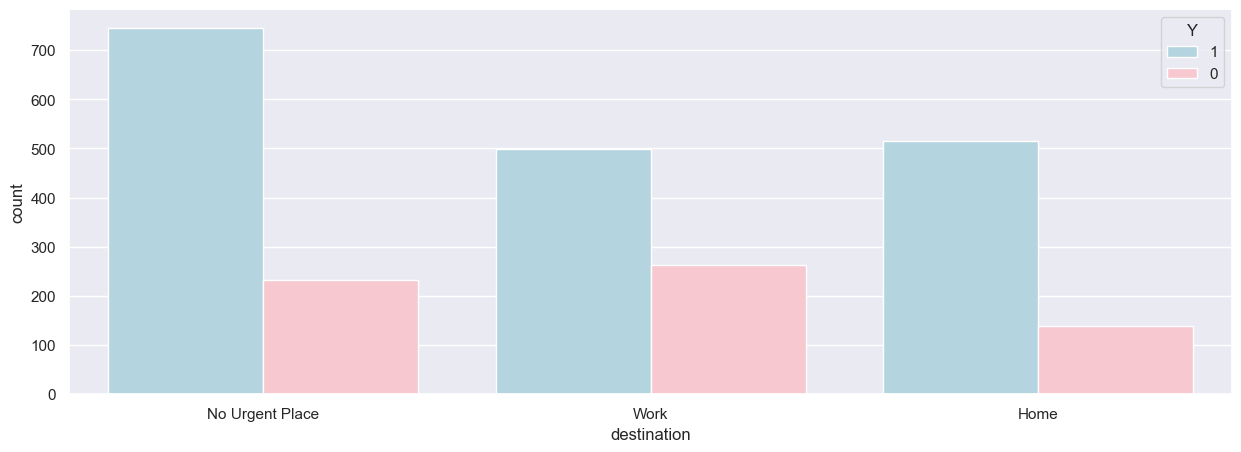

In [733]:
pxfig3 = px.bar(df_carry_away_coupon,x="destination",title="Acceptance of Carry Away Coupon by Destination",color =df_carry_away_coupon.Y.astype(str), labels={"destination": "Driver's Destination"} )
pxfig3.show()
pxfig3.write_image("images/carry_away_by_destination.png")
#pl.offline.plot(pxfig3, filename='images/carry_away_by_destination.html')


#Same graph in Seaborn to visualize in GitHub as well for ease of use:
fig_ind3, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="destination",data=df_carry_away_coupon,
                    hue=df_carry_away_coupon.Y.astype(str),
                       palette=['lightblue', 'pink'])


plt.show()

#### The drill down shows that No Urgent Place as a destination and going Home have a high acceptance rate compared to work as a destination

5. Compare those that are not going to a place urgently and look at the the direction they were heading and compare the coupon acceptance rate for both direction that was the same as the destination and the driection that was opposite from their intended destination

In [705]:
df_carryaway_dir_same = df_carry_away_coupon.query('(direction_same == 1) and (direction_opp == 0)').groupby(['Y'])[['Y']].count()
df_carryaway_dir_same['percent'] = (df_carryaway_dir_same['Y']/df_carryaway_dir_same.Y.sum())*100
display (df_carryaway_dir_same)

df_carryaway_dir_opp = df_carry_away_coupon.query('(direction_same == 0) and (direction_opp == 1)').groupby(['Y'])[['Y']].count()
df_carryaway_dir_opp['percent'] = (df_carryaway_dir_opp['Y']/df_carryaway_dir_opp.Y.sum())*100
display (df_carryaway_dir_opp)


,Y,percent
Y,,
0,235,29.6343
1,558,70.3657


,Y,percent
Y,,
0,398,24.875
1,1202,75.125


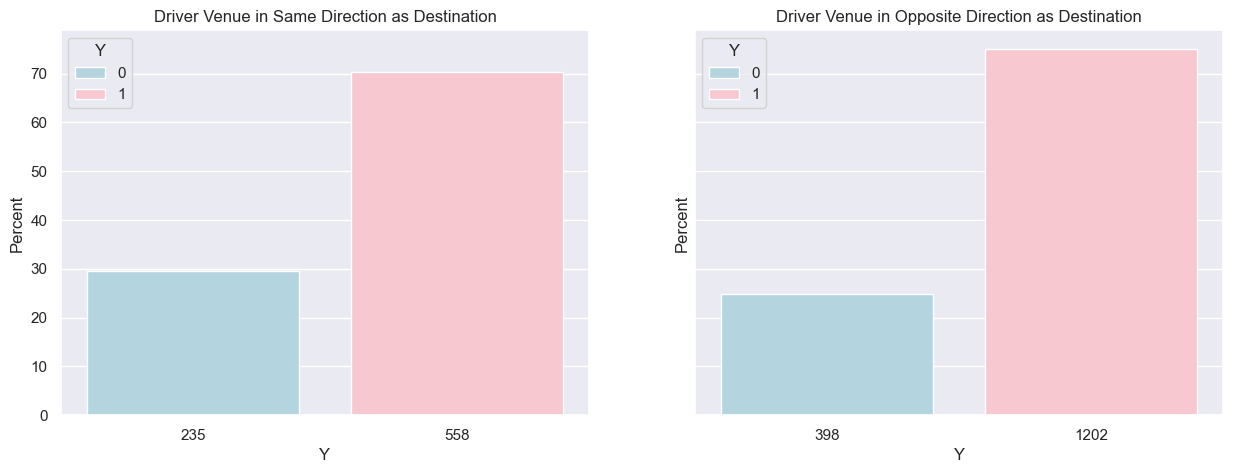

In [719]:
# Create subplots to visualize the Direction of Venue based on intended driver destination 
#
#
fig_ind3, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Acceptance between 3 groups of drivers per Prompt:')

sns.barplot(ax=axes[0], x=df_carryaway_dir_same['Y'], y=df_carryaway_dir_same['percent'], hue=df_carryaway_dir_same.index.astype(str), palette=['lightblue', 'pink'], dodge=False)
sns.barplot(ax=axes[1], x=df_carryaway_dir_opp['Y'], y=df_carryaway_dir_opp['percent'], hue=df_carryaway_dir_opp.index.astype(str), palette=['lightblue', 'pink'], dodge=False)
axes[0].set_title("Driver Venue in Same Direction as Destination")
axes[1].set_title("Driver Venue in Opposite Direction as Destination")
axes[0].set(ylabel='Percent')
axes[1].set(ylabel='Percent')

plt.show()

#### When comparing the acceptance rates of drivers driving to a pickup at a restaurant that is in the same direction as their destination (70% Acceptance of Carry Away coupon) versus drivers driving to pickup at a restaurant that is in the opposite direction as their desitnation (75%) 
1. The acceptance rates do not varry by much (~ 5% greater acceptance for restaurants in the opposite direction)   

#### Based Upon the analysis conducted on Carry Out & Take Away  Coupons there are some observations to help develop a campaign targetted at the optimal auidence for any marketing / promotional coupons
1. Drivers going home or to a destination that is not urgent have a high combined acceptance rate compared to those that have a destination of work.
2. Direction does not seem to matter much when it comes to acceptance rates of this coupon - rates of acceptance are close irrespective of destination in the same direction as coupon venue (70% acceptance ) vs. destination in the opposite direction of the coupon venue (75% acceptance)
3. Passengers that were driving alone tend to have a rate that is very high and equal to those that drive  with passangers.  